# Week 9: Point Estimation, Confidence Intervals, and Hypothesis Testing (Interactive Lab)

**NOTE:** This notebook uses the exact example values from the lecture slides.

In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import math
np.random.seed(42)
plt.rcParams['figure.figsize'] = (8,4)

## Quick Concept Check 💡
1. What is a point estimate vs a confidence interval?
  - Point Estimate: a single value considered an estimate for the population parameter
  - Confidence Interval: a range of values that is likely to contain the population parameter
2. What does a 95% confidence level mean?
  - We are 95% confident that the true population mean falls within the constructed interval
3. List the five steps of hypothesis testing.
   1. State the null and alternative hypothesis
   2. Graph the data and check technical assumptions
   3. Calculate the test statistic
   4. Calculate the p-value
   5. State your calculations
   

## Confidence Interval for the Mean (σ known)

**Example 1 (from slides):** Sample of n=100, sample mean = 7.5, population σ = 3.0. Compute a 95% confidence interval for μ.

**Try it 🔢:** Compute the CI and plot the normal distribution of the sample mean with the CI bounds marked.

In [54]:
xbar = 7.5
sigma = 3.0
n = 200
alpha = 0.1 #(1-alpha)*100 % Confidence Interval
import scipy.stats as stats
z = stats.norm.ppf(1-alpha/2)
se = sigma/np.sqrt(n)
ci_low = xbar - z*se
ci_high = xbar + z*se
ci_low, ci_high

(7.151073853896998, 7.848926146103002)

**Question 1:** what is the lower bound of the *90 %* confidence interval if we sample n=200 instead of 100 ?

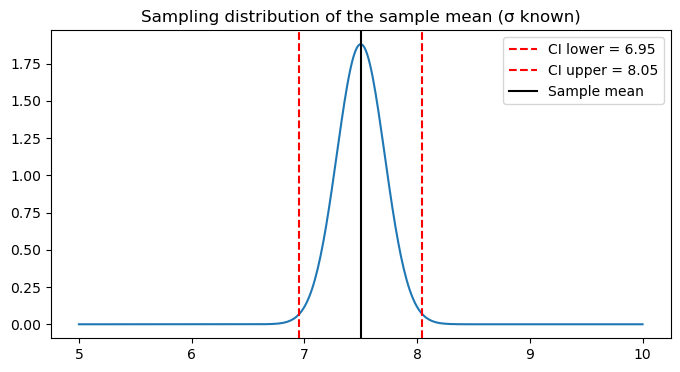

In [50]:
xs = np.linspace(5,10,400)
sampling_dist = stats.norm(loc=xbar, scale=se)
import matplotlib.pyplot as plt
plt.plot(xs, sampling_dist.pdf(xs))
plt.axvline(ci_low, color='red', linestyle='--', label=f'CI lower = {ci_low:.2f}')
plt.axvline(ci_high, color='red', linestyle='--', label=f'CI upper = {ci_high:.2f}')
plt.axvline(xbar, color='black', label='Sample mean')
plt.title('Sampling distribution of the sample mean (σ known)')
plt.legend()
plt.show()

**Question 2:** What happens to the CI width if we increase the confidence level to 99%? Recompute and record the new interval.
- It becomes widers

In [56]:
xbar = 7.5
sigma = 3.0
n = 100
alpha = 0.01 #(1-alpha)*100 % Confidence Interval
import scipy.stats as stats
z = stats.norm.ppf(1-alpha/2)
se = sigma/np.sqrt(n)
ci_low = xbar - z*se 
ci_high = xbar + z*se
ci_low, ci_high

(6.72725120893533, 8.27274879106467)

For better visualization, can you try to plot both intervals (95% and 99%) in the same plot? (you need to add two more lines to the folowing code! make sure to give different names such as ci_low99 and ci_high99 so you can plot all at the same time)

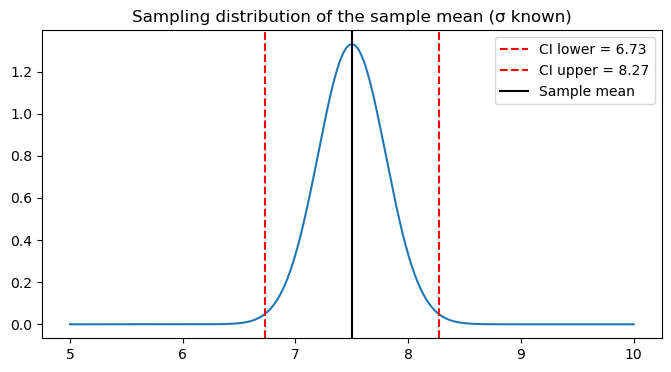

In [58]:
xs = np.linspace(5,10,400)
sampling_dist = stats.norm(loc=xbar, scale=se)
import matplotlib.pyplot as plt
plt.plot(xs, sampling_dist.pdf(xs))
plt.axvline(ci_low, color='red', linestyle='--', label=f'CI lower = {ci_low:.2f}')
plt.axvline(ci_high, color='red', linestyle='--', label=f'CI upper = {ci_high:.2f}')
plt.axvline(xbar, color='black', label='Sample mean')
plt.title('Sampling distribution of the sample mean (σ known)')
plt.legend()
plt.show()

## Confidence Interval for the Mean (σ unknown — t-distribution)

**Example 2 (from slides):** n=250, sample mean = 502, sample s = 10.5. Compute a 90% CI for μ using t (or z approximation as in slides).

**Try it 🔢:** Compute the 90% CI and plot the t-distribution with df = n-1 marking the CI.

In [70]:
xbar2 = 502
s = 10.5
n2 = 250
alpha2 = 0.1
df = n2 - 1
import scipy.stats as stats
t_crit = stats.t.ppf(1-alpha2/2, df)
se2 = s/np.sqrt(n2)
ci2_low = xbar2 - t_crit*se2
ci2_high = xbar2 + t_crit*se2
ci2_low, ci2_high

(500.90360926803066, 503.09639073196934)

**Question 3:** With the same settings in example 2, what is the upper bound of the 90% confidence interval if we sample n=100 instead of 250?

In [72]:
xbar2 = 502
s = 10.5
n2 = 100
alpha2 = 0.1
df = n2 - 1
import scipy.stats as stats
t_crit = stats.t.ppf(1-alpha2/2, df)
se2 = s/np.sqrt(n2)
ci2_low = xbar2 - t_crit*se2
ci2_high = xbar2 + t_crit*se2
ci2_low, ci2_high

(500.2565892862038, 503.7434107137962)

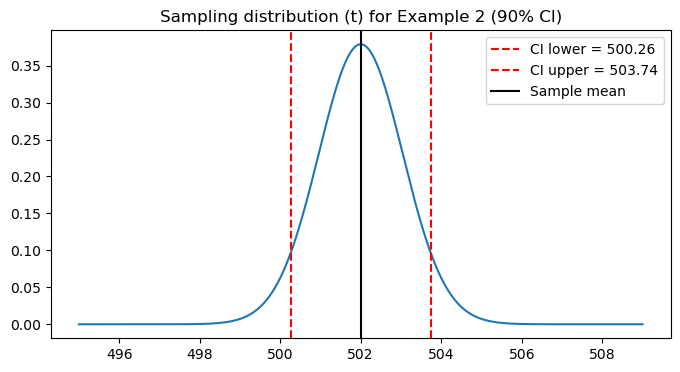

In [74]:
xs = np.linspace(495, 509, 400)
tdist = stats.t(df, loc=xbar2, scale=se2)
import matplotlib.pyplot as plt
plt.plot(xs, tdist.pdf(xs))
plt.axvline(ci2_low, color='red', linestyle='--', label=f'CI lower = {ci2_low:.2f}')
plt.axvline(ci2_high, color='red', linestyle='--', label=f'CI upper = {ci2_high:.2f}')
plt.axvline(xbar2, color='black', label='Sample mean')
plt.title('Sampling distribution (t) for Example 2 (90% CI)')
plt.legend()
plt.show()

**Question 4:** The slides used z* ≈ 1.645 because n>75. Compare the t-based and z-based intervals. Are they practically different? Which one is wider?
- The interval with t critical is wider, but they are not practically different

## Confidence Interval for a Proportion

**Example 3 (from slides):** n=250, successes = 175. Compute a 95% CI for p.

**Try it 🔢:** Compute the sample proportion, standard error, CI, and plot a binomial proportion sampling distribution approximation.

In [82]:
n3 = 250
succ = 175
p_hat = succ/n3
z95 = stats.norm.ppf(0.975)
se_p = np.sqrt(p_hat*(1-p_hat)/n3)
ci_p_low = p_hat - z95*se_p
ci_p_high = p_hat + z95*se_p
p_hat, ci_p_low, ci_p_high

(0.3, 0.24319484698213492, 0.3568051530178651)

**Question 5:** if we know only 75 of those 250 law students passed the exam, what would be the 95% confidence interval for the population proportion of students who pass the exam?

In [88]:
n3 = 250
succ = 75
p_hat = succ/n3
z95 = stats.norm.ppf(0.975)
se_p = np.sqrt(p_hat*(1-p_hat)/n3)
ci_p_low = p_hat - z95*se_p
ci_p_high = p_hat + z95*se_p
p_hat, ci_p_low, ci_p_high

(0.3, 0.24319484698213492, 0.3568051530178651)

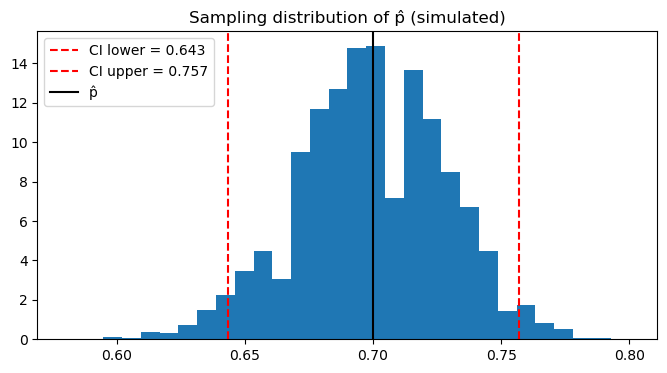

In [17]:
trials = 5000
samps = np.random.binomial(n3, p_hat, size=trials)/n3
import matplotlib.pyplot as plt
plt.hist(samps, bins=30, density=True)
plt.axvline(ci_p_low, color='red', linestyle='--', label=f'CI lower = {ci_p_low:.3f}')
plt.axvline(ci_p_high, color='red', linestyle='--', label=f'CI upper = {ci_p_high:.3f}')
plt.axvline(p_hat, color='black', label='p̂')
plt.title('Sampling distribution of p̂ (simulated)')
plt.legend()
plt.show()

**Question 6:** If we wanted a margin of error of 0.04 for a 95% CI for a proportion, what sample size would we need (use the simplified formula n = 1/m^2)? Compute and round up.
- 625

## Hypothesis Test for a Proportion (Example 5)

Slides: n=1391, successes=552, p0=0.45. Test H0: p=0.45 vs Ha: p≠0.45. Compute z-statistic and p-value.

**Try it 🔢:** Compute z and p-value, and state the decision at α=0.05.

In [91]:
n5 = 1391
succ5 = 552
p0 = 0.45
p_hat5 = succ5/n5
se5 = np.sqrt(p0*(1-p0)/n5)
z_stat = (p_hat5 - p0)/se5
pval = 2*stats.norm.cdf(-abs(z_stat))
p_hat5, z_stat, pval

(0.3968368080517613, -3.985538527201448, 6.73272512806312e-05)

**Question 7:** If we want to test p0=0.4 instead of p0=0.45 in the null, what would be the p-value? and what is the interpretation?

In [93]:
n5 = 1391
succ5 = 552
p0 = 0.4
p_hat5 = succ5/n5
se5 = np.sqrt(p0*(1-p0)/n5)
z_stat = (p_hat5 - p0)/se5
pval = 2*stats.norm.cdf(-abs(z_stat))
p_hat5, z_stat, pval

(0.3968368080517613, -0.24081497541551958, 0.8096985224341477)

## Hypothesis Test for a Mean (Example 6)

Slides: n=450, sample mean = 7.55, s = 1.50, µ0 = 7.75. Test H0: µ = 7.75 vs Ha: µ < 7.75. Compute t-statistic and p-value.

**Try it 🔢:** Compute t, p-value, and state decision at α=0.05.

In [99]:
n6 = 450
xbar6 = 7.55
s6 = 1.5
mu0 = 7.75
t_stat = (xbar6 - mu0)/(s6/np.sqrt(n6))
df6 = n6 - 1
pval6 = stats.t.cdf(t_stat, df6)
t_stat, pval6

(-2.8284271247461925, 0.0024435456163738817)

**Question 8:** If we test the opposite alternative (µ > 7.75), what would be the p-value?

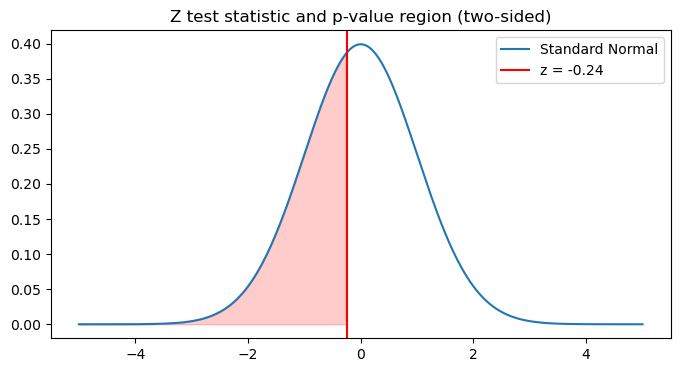

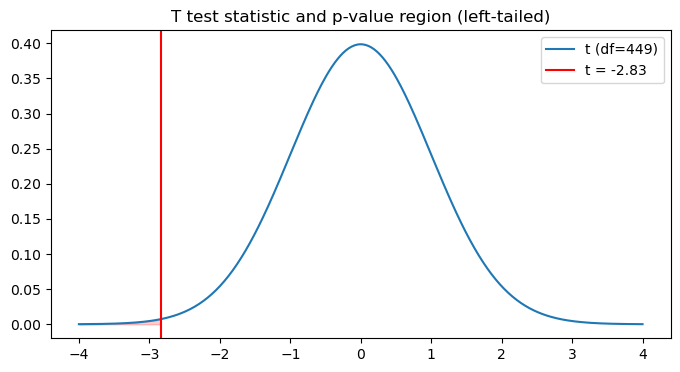

In [97]:
import matplotlib.pyplot as plt
xs_z = np.linspace(-5,5,400)
plt.plot(xs_z, stats.norm.pdf(xs_z), label='Standard Normal')
plt.axvline(z_stat, color='red', label=f'z = {z_stat:.2f}')
plt.fill_between(xs_z, 0, stats.norm.pdf(xs_z), where=(xs_z<=z_stat), color='red', alpha=0.2)
plt.title('Z test statistic and p-value region (two-sided)')
plt.legend()
plt.show()

xs_t = np.linspace(-4,4,400)
plt.plot(xs_t, stats.t.pdf(xs_t, df6), label=f't (df={df6})')
plt.axvline(t_stat, color='red', label=f't = {t_stat:.2f}')
plt.fill_between(xs_t, 0, stats.t.pdf(xs_t, df6), where=(xs_t<=t_stat), color='red', alpha=0.2)
plt.title('T test statistic and p-value region (left-tailed)')
plt.legend()
plt.show()

## Wrap-up & Reflection
1. How are confidence intervals and hypothesis tests related?
   - Both use sample data to create insights about a population parameter. However, a confidence interval gives the possible range the parameter can fall within while the hypothesis test evaluates whether a specific value of the parameter aligns with the data. If the null hypothesis is outside the CI the null would be rejected. As a result, if the null hypothesis is inside the CI, the null would not be rejected.
2. How does increasing sample size affect CI width and p-values?
   - More narrow CI width (more precise estimates), smaller p-values (more power to detect differences)